In [1]:
# written by Yuchao Jiang on 2020.3.27
# use rainymotion library
# based on rainy_forecast_one_hour.py
# based on forecast_every_5min.py
# based on OF_vs_kakuho.ipynb
# based on local_data_to_motion_vector.py

import os
import numpy as np
import glob
from datetime import datetime,timedelta
from rainymotion import models, metrics, utils
from time import time
import cv2
import matplotlib.pyplot as plt
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import joblib 

t0 = time()
#print(os.getcwd())
data_folder = "/Users/jiang/data/kakuho_dev"  ## in local computer 
output_folder = "./output_vector"
if not os.path.exists(data_folder):
	data_folder = "../../../usr/amoeba/pub/rain_kakuho/hres.jma_nowcast/out"
bin_files = glob.glob(os.path.join(data_folder,"*ints.1km.bin"))  # 288 = 12*24
bin_files.sort()
if len(bin_files) < 14:
	print("No enough data, please check folder:")
	print(data_foler)
	sys.exit(0)
now_files = bin_files[-14:-12]
truth_file = bin_files[-1]
print("--------------- using these files ---------------")
print(*now_files, sep = "\n")
print(truth_file)

datetime_str = now_files[-1].split("/")[-1].split(".")[0]
datetime_object = datetime.strptime(datetime_str,"%Y%m%d%H%M")
print("--------------- now time is: ---------------")
print(datetime_object)

threshold = 0.1
inputs = np.zeros(shape = (2,3360,2560), dtype = np.float32)
for i, bin_file in enumerate(now_files):
	inputs[i] = np.fromfile(bin_file, dtype = "float32").reshape((3360,2560))
mask = inputs[0] < 0
inputs[inputs < 0] = 0

gt_in_60_min = np.fromfile(truth_file, dtype = "float32").reshape((3360,2560))

model = models.Dense()
model.input_data = inputs
model.lead_steps = 13
prediciton = model.run()


--------------- using these files ---------------
/Users/jiang/data/kakuho_dev/202002270440.prec.ints.1km.bin
/Users/jiang/data/kakuho_dev/202002270445.prec.ints.1km.bin
/Users/jiang/data/kakuho_dev/202002270545.prec.ints.1km.bin
--------------- now time is: ---------------
2020-02-27 04:45:00


/Users/jiang/anaconda3/envs/rainymotion/lib/python3.7/site-packages/wradlib/ipol.py:368: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1.0 / self.dists ** self.p


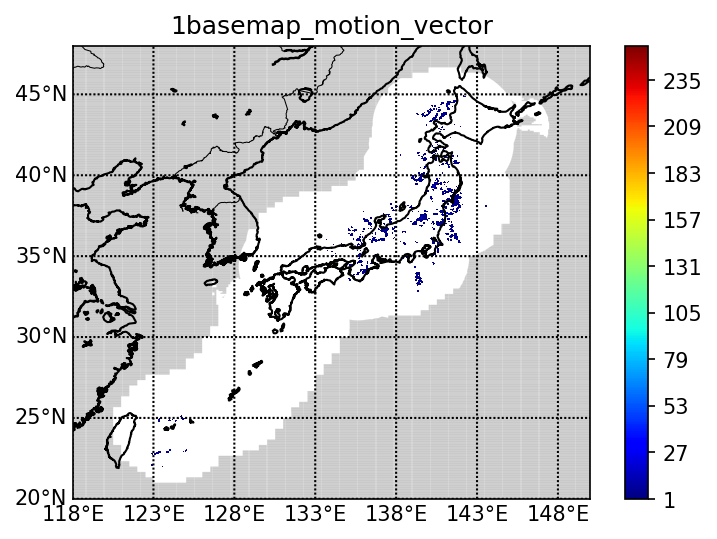

In [2]:
plt.figure(dpi=150)
i = 1
m = Basemap(llcrnrlat=20,urcrnrlat=48, llcrnrlon=118, urcrnrlon=150,resolution = "i")
lon = np.linspace(118.00625, 149.99375, 2560)
lat = np.linspace(20.004167, 47.995833, 3360)
lons, lats = np.meshgrid(lon, lat)
m.contourf(lons, lats, prediciton[-1], levels=list(range(1,255)),cmap='jet' )
m.drawcoastlines(color='black')
m.drawcountries()
m.drawmeridians(np.arange(118, 150, 5), labels=[1,0,0,1])# left, right, top or bottom
m.drawparallels(np.arange(20, 48, 5), labels=[1,0,1,0])
plt.colorbar()

m.pcolormesh(lons, lats, mask, cmap= "binary", alpha=0.002)
plt.title(f"{i}basemap_motion_vector")
#plt.savefig(f"{i}_basemap_motion_vector.png",format = "png",bbox_inches='tight')
plt.show()

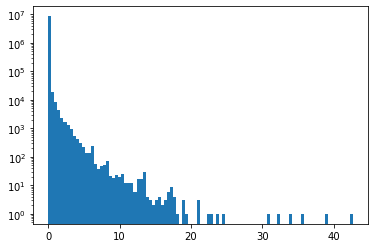

In [9]:
plt.figure()
plt.hist(prediciton[-1].flatten(),100)
plt.yscale('log')
plt.show()

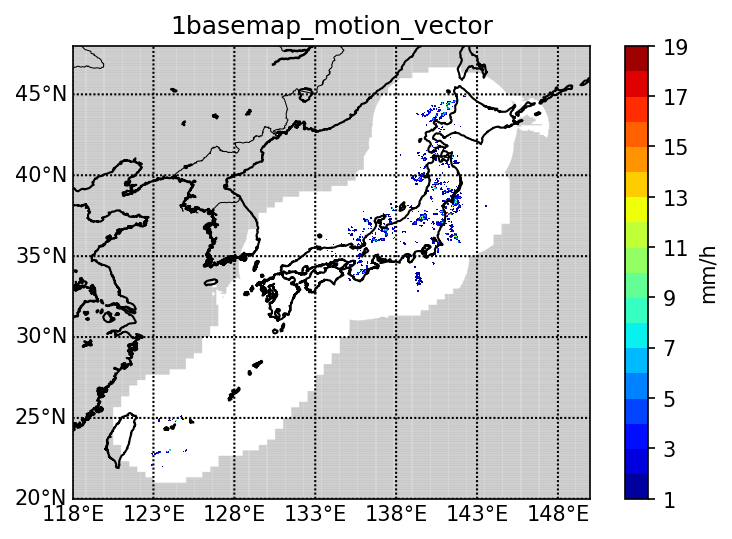

In [13]:
plt.figure(dpi=150)
i = 1
m = Basemap(llcrnrlat=20,urcrnrlat=48, llcrnrlon=118, urcrnrlon=150,resolution = "i")
lon = np.linspace(118.00625, 149.99375, 2560)
lat = np.linspace(20.004167, 47.995833, 3360)
lons, lats = np.meshgrid(lon, lat)
m.contourf(lons, lats, prediciton[-1],levels=list(range(1,20)),cmap='jet' )
m.drawcoastlines(color='black')
m.drawcountries()
m.drawmeridians(np.arange(118, 150, 5), labels=[1,0,0,1])# left, right, top or bottom
m.drawparallels(np.arange(20, 48, 5), labels=[1,0,1,0])
plt.colorbar(label='mm/h')

m.pcolormesh(lons, lats, mask, cmap= "binary", alpha=0.002)
plt.title(f"{i}basemap_motion_vector")
#plt.savefig(f"{i}_basemap_motion_vector.png",format = "png",bbox_inches='tight')
plt.show()

In [20]:
f"now = {datetime_object.strftime('%Y-%m-%d %H:%M')} UTC,+{str(i*5).zfill(2)} min"

'now = 2020-02-27 04:45 UTC,+05 min'

In [21]:
 bin_files[-2:]

['/Users/jiang/data/kakuho_dev/202002270540.prec.ints.1km.bin',
 '/Users/jiang/data/kakuho_dev/202002270545.prec.ints.1km.bin']